# AutoEncoder 

### Imports

In [1]:
from NeuralModels.AutoEncoder import AutoEncoder, AutoEncoderOptimization
from utils.DataManager import DataManager
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay

#### Lê os dados usando classe própria `DataManager` -> Uso bem simples

In [2]:
data_manager = DataManager(r'..\data\Train.xlsx')

In [3]:
df = data_manager.get_original_df()

proporcao_classes = df['Class'].value_counts(normalize=True) * 100

print('Proporção das classes:', proporcao_classes)

Proporção das classes: Class
0    99.785059
1     0.214941
Name: proportion, dtype: float64


In [5]:
X_train, X_test, y_train, y_test = data_manager.train_test_splits(0.7)

y_train.value_counts(normalize=True) * 100

Class
0    99.785145
1     0.214855
Name: proportion, dtype: float64

In [9]:
from sklearn.model_selection import StratifiedKFold


SKFcv = StratifiedKFold(n_splits=5)

In [10]:
autoencoder = AutoEncoder()
optimizator = AutoEncoderOptimization(X_train,y_train, model=autoencoder, lr=0.0001)
train_losses = optimizator.fit(epochs=100)

Epoch [1/100], loss:0.17837998803083924
Epoch [2/100], loss:0.14158853184096898
Epoch [3/100], loss:0.13233511873790224
Epoch [4/100], loss:0.128036606410918
Epoch [5/100], loss:0.12526478009563352
Epoch [6/100], loss:0.1241408259821177
Epoch [7/100], loss:0.12361966893947825
Epoch [8/100], loss:0.12314775525992738
Epoch [9/100], loss:0.12243605362997392
Epoch [10/100], loss:0.12181344706302827
Epoch [11/100], loss:0.12151512898963009
Epoch [12/100], loss:0.12131313338871623
Epoch [13/100], loss:0.12112800945959946
Epoch [14/100], loss:0.12089126395782719
Epoch [15/100], loss:0.1205062328392239
Epoch [16/100], loss:0.11995704354697073
Epoch [17/100], loss:0.11956996087274145
Epoch [18/100], loss:0.1192797508185085
Epoch [19/100], loss:0.11856304315527169
Epoch [20/100], loss:0.11803383690805579
Epoch [21/100], loss:0.11778106623075979
Epoch [22/100], loss:0.11767151491649629
Epoch [23/100], loss:0.11753850411069018
Epoch [24/100], loss:0.11746340608724538
Epoch [25/100], loss:0.1174108

Text(0.5, 1.0, 'Without Fraud')

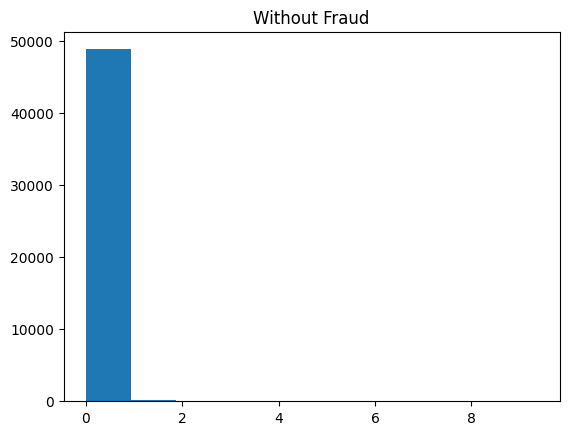

In [11]:
from matplotlib import pyplot as plt


df_anomaly = optimizator.predict(X_test, y_test)

no_fraud = df_anomaly[(df_anomaly['Class']== 0) & (df_anomaly['Test_Losses'] < 10)]

plt.hist(no_fraud.Test_Losses)
plt.title('Without Fraud')

Text(0.5, 1.0, 'With Fraud')

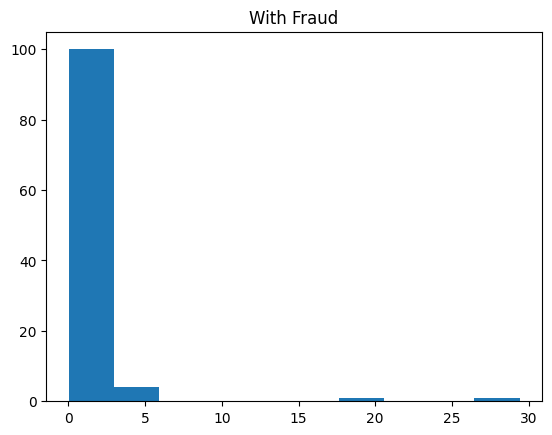

In [12]:
fraud = df_anomaly[(df_anomaly['Class']== 1)]

plt.hist(fraud.Test_Losses)
plt.title('With Fraud')

Text(0.5, 0, 'False Positive Rate')

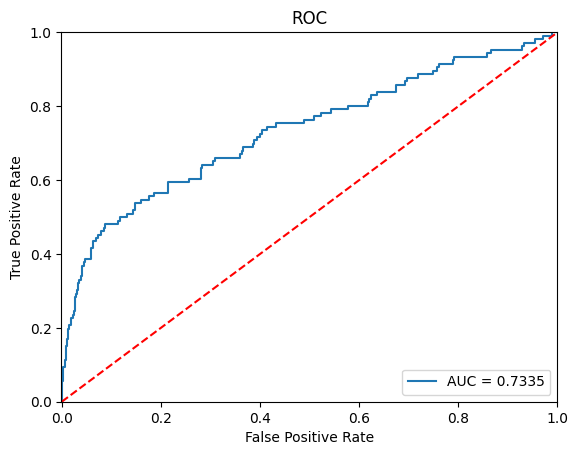

In [13]:
from sklearn.metrics import auc, roc_curve


fpr, tpr, thresholds = roc_curve(df_anomaly.Class, df_anomaly.Test_Losses)
roc_auc = auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

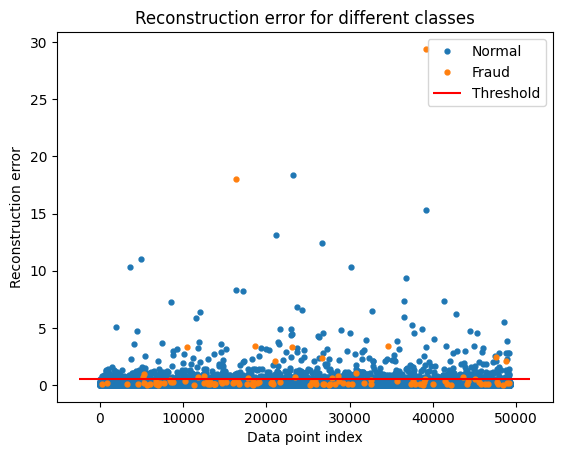

In [16]:
threshold = 0.5
groups = df_anomaly.groupby('Class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Test_Losses, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

<Figure size 1200x1200 with 0 Axes>

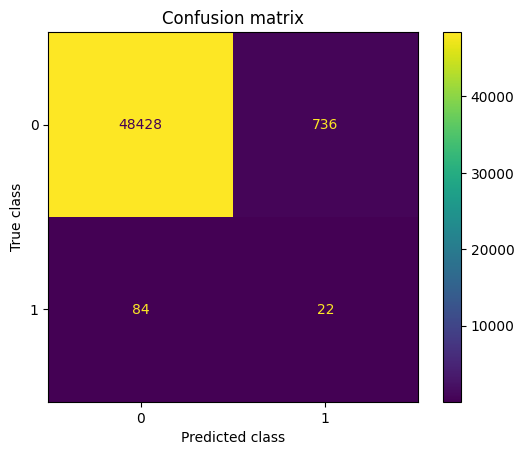

In [17]:
y_pred = [1 if e > threshold else 0 for e in df_anomaly.Test_Losses.values]
conf_matrix = confusion_matrix(df_anomaly.Class, y_pred)
plt.figure(figsize=(12, 12))

c = ConfusionMatrixDisplay(confusion_matrix = conf_matrix).plot()


plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()